# HT 7. Tensorflow2

**MINERÍA DE DATOS - SECCIÓN - 20 - 2024 - 1**

Samuel Chamalé, 21881

Renatto Guzmán, 21646

---


In [14]:
# Importando las librerías necesarias para las simulaciones
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import KFold

In [2]:
%matplotlib inline

In [12]:
def simpleLinearRegression(observaciones=1000, learning_rate=0.02, epochs=100, loss='mean_squared_error'):
    # Definición de las variables y el modelo según el código proporcionado en el ejemplo
    # Generando datos aleatorios para x1 y x2
    x1 = np.random.uniform(low=-10, high=10, size=(observaciones, 1))
    x2 = np.random.uniform(-10, 10, (observaciones, 1))
    X = np.column_stack((x1, x2))

    ruido = np.random.uniform(-1, 1, (observaciones, 1))

    y = 2 * x1 - 3 * x2 + 5 + ruido

    np.savez('DatosRegression', inputs=X, targets=y)
    datos = np.load('DatosRegression.npz')

    tamanio_entrada = 2
    tamanio_salida = 1

    modelo = tf.keras.Sequential([
        tf.keras.layers.Dense(
            tamanio_salida,
            kernel_initializer=tf.random_uniform_initializer(
                minval=-0.1, maxval=0.1),
            bias_initializer=tf.random_uniform_initializer(
                minval=-0.1, maxval=0.1)
        )
    ])

    optimizador_adhoc = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    if loss == 'huber_loss':
        use_loss = tf.keras.losses.Huber()
    else:
        use_loss = loss

    modelo.compile(optimizer=optimizador_adhoc, loss=use_loss)

    modelo.fit(datos['inputs'], datos['targets'], epochs=epochs, verbose=0)

    pesos = modelo.layers[0].get_weights()[0]
    sesgos = modelo.layers[0].get_weights()[1]

    plt.figure(figsize=(10, 10))
    plt.plot(np.squeeze(modelo.predict_on_batch(datos['inputs'])),
             np.squeeze(datos['targets']), color='red')
    plt.suptitle('Predicciones vs Metas Reales', fontsize=20)
    plt.title(
        f"[observaciones={observaciones}, learning_rate={learning_rate}, epochs={epochs}, loss={loss}] [pesos={np.squeeze(pesos)} sesgos={np.squeeze(sesgos)}]"
    )

    plt.xlabel('Prediciones')
    plt.ylabel('Metas Reales')
    plt.show()

In [18]:
def simpleLinearRegressionCrossValidated(observaciones=1000, learning_rate=0.02, epochs=100, loss='mean_squared_error', n_splits=5):
    # Generando datos aleatorios para x1 y x2
    x1 = np.random.uniform(low=-10, high=10, size=(observaciones, 1))
    x2 = np.random.uniform(-10, 10, (observaciones, 1))
    X = np.column_stack((x1, x2))

    ruido = np.random.uniform(-1, 1, (observaciones, 1))
    y = 2 * x1 - 3 * x2 + 5 + ruido
    # Convert targets to binary (0 or 1) for precision calculation
    y = (y > np.median(y)).astype(int)

    # Configuración de KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    resultados = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        tamanio_entrada = 2
        tamanio_salida = 1

        modelo = tf.keras.Sequential([
            tf.keras.layers.Dense(tamanio_salida,
                                  kernel_initializer=tf.random_uniform_initializer(
                                      minval=-0.1, maxval=0.1),
                                  bias_initializer=tf.random_uniform_initializer(
                                      minval=-0.1, maxval=0.1),
                                  activation='sigmoid')  # Use sigmoid for binary classification
        ])

        optimizador_adhoc = tf.keras.optimizers.SGD(
            learning_rate=learning_rate)

        if loss == 'huber_loss':
            use_loss = tf.keras.losses.Huber()
        else:
            use_loss = loss

        # Compile model with precision as a metric
        modelo.compile(optimizer=optimizador_adhoc, loss=use_loss, metrics=[
                       tf.metrics.BinaryAccuracy(), tf.metrics.Precision()])

        modelo.fit(X_train, y_train, epochs=epochs, verbose=0)

        # Evaluar el modelo
        loss_c, accuracy, precision = modelo.evaluate(
            X_test, y_test, verbose=0)
        print(
            f"Loss: {loss_c}, Accuracy: {accuracy}, Precision: {precision} en esta iteración")

        # Almacenar resultados para el análisis posterior
        resultados.append((loss_c, accuracy, precision))

    # Reportar la precisión y pérdida media
    print("Resultados finales de validación cruzada:", resultados)
    print("Promedio de la pérdida:", np.mean([r[0] for r in resultados]))
    print("Promedio de la precisión:", np.mean([r[2] for r in resultados]))

## 1. Optimización de Hiperparámetros:


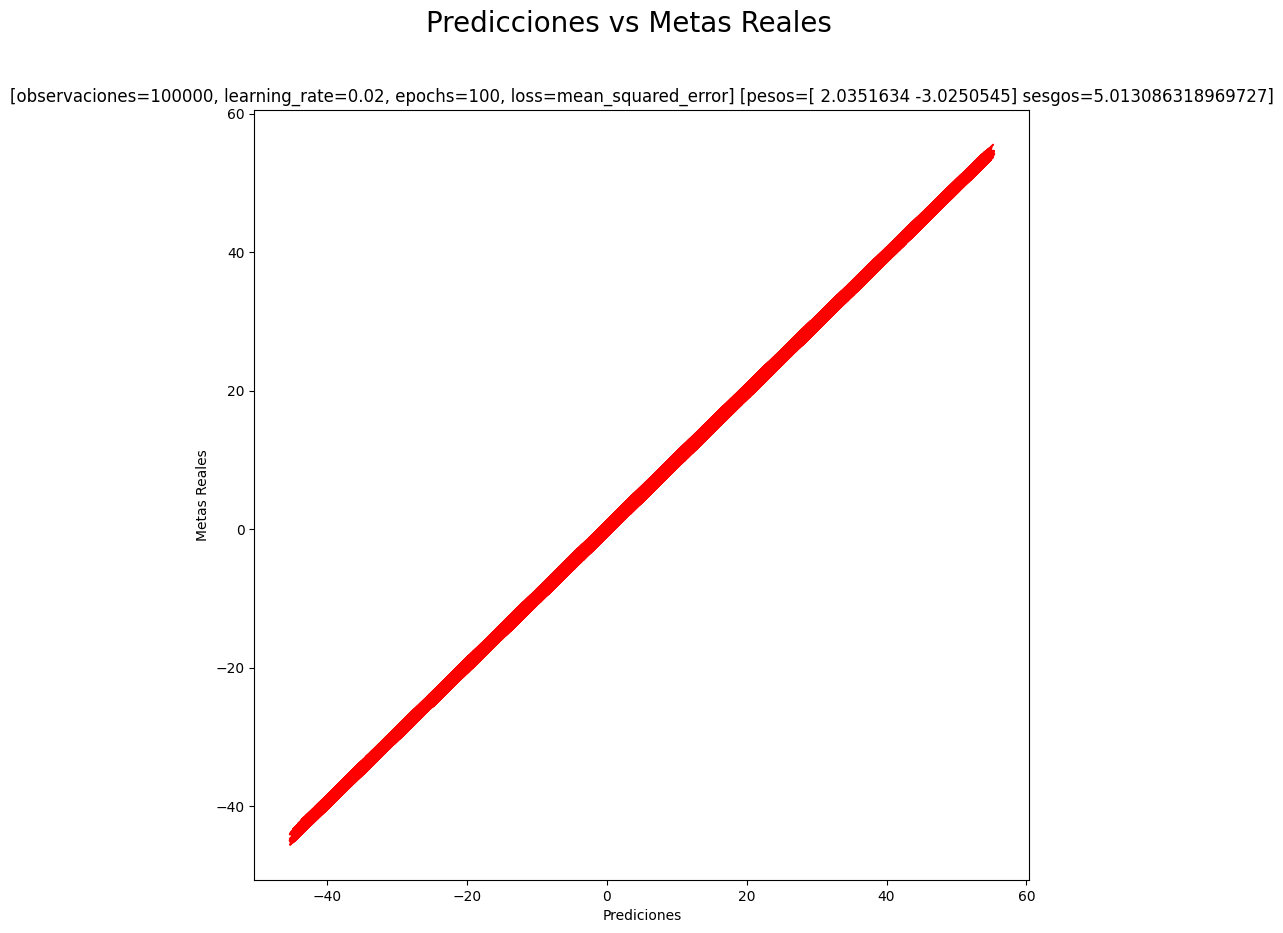

In [4]:
# Cambie el número de observaciones a 100,000. Este no es un hiperparámetro
# pero puede afectar el rendimiento del modelo. ¿Qué ocurre?
simpleLinearRegression(100000)

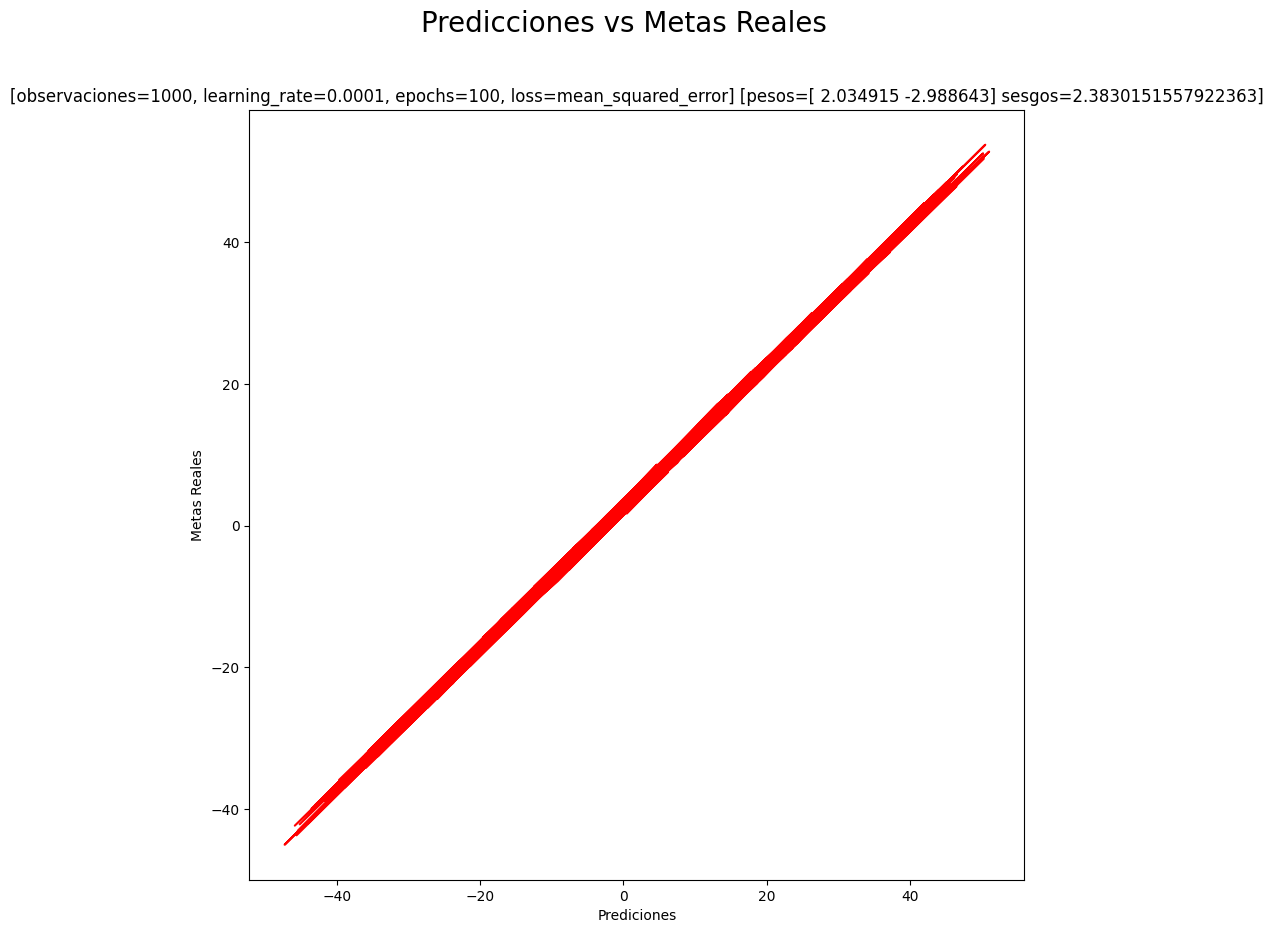

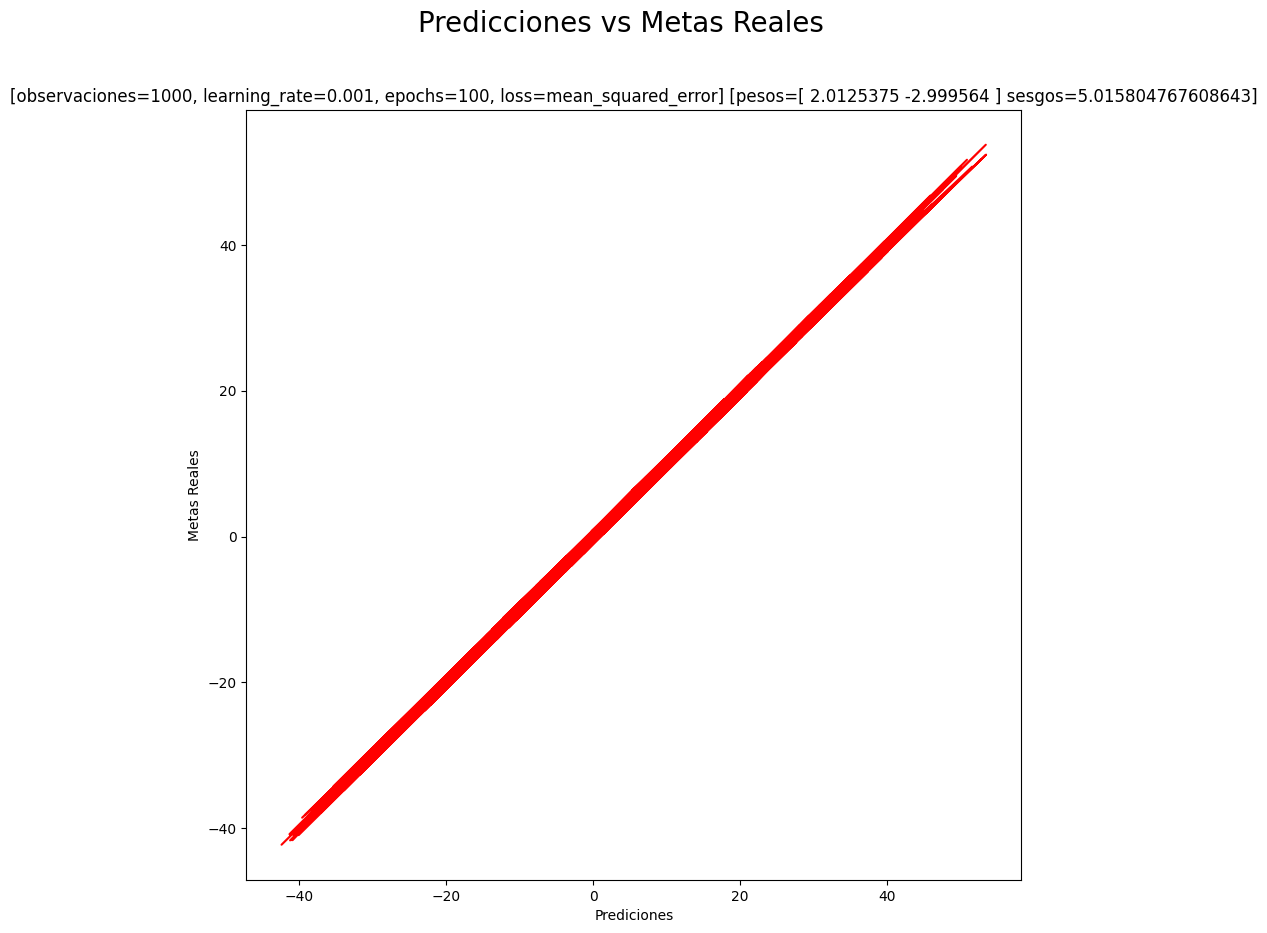

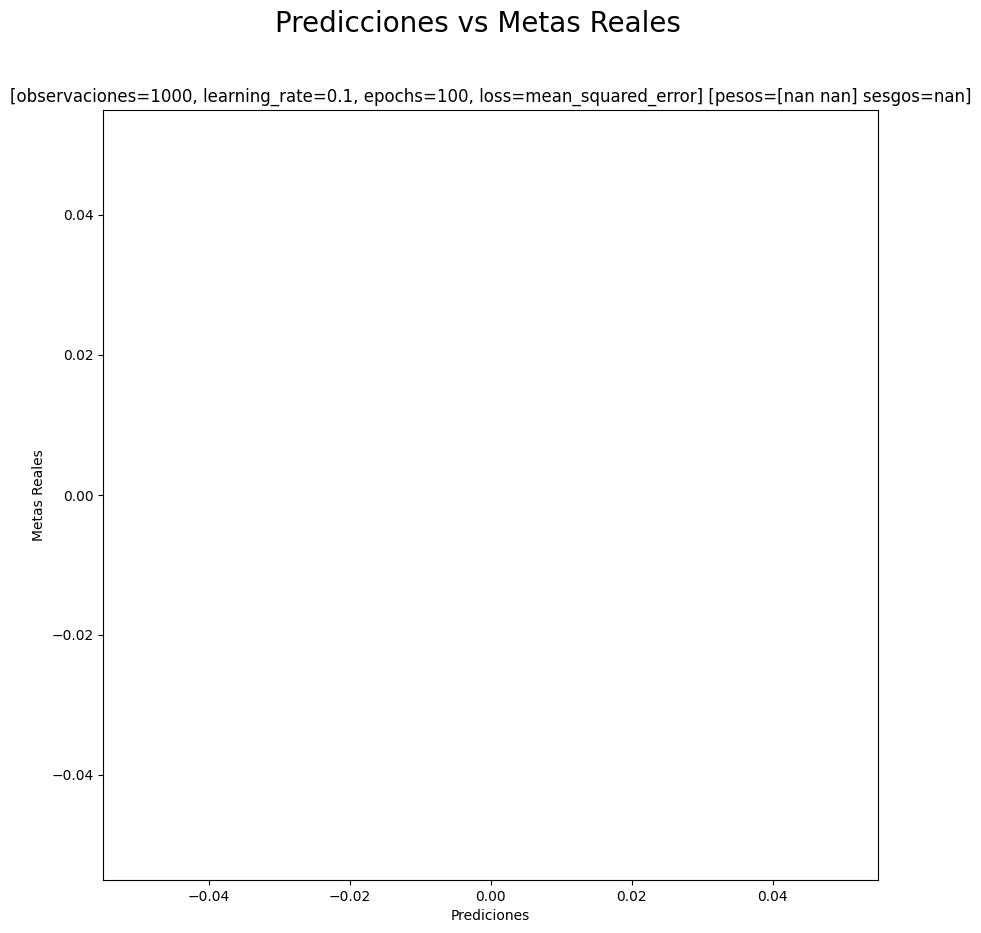

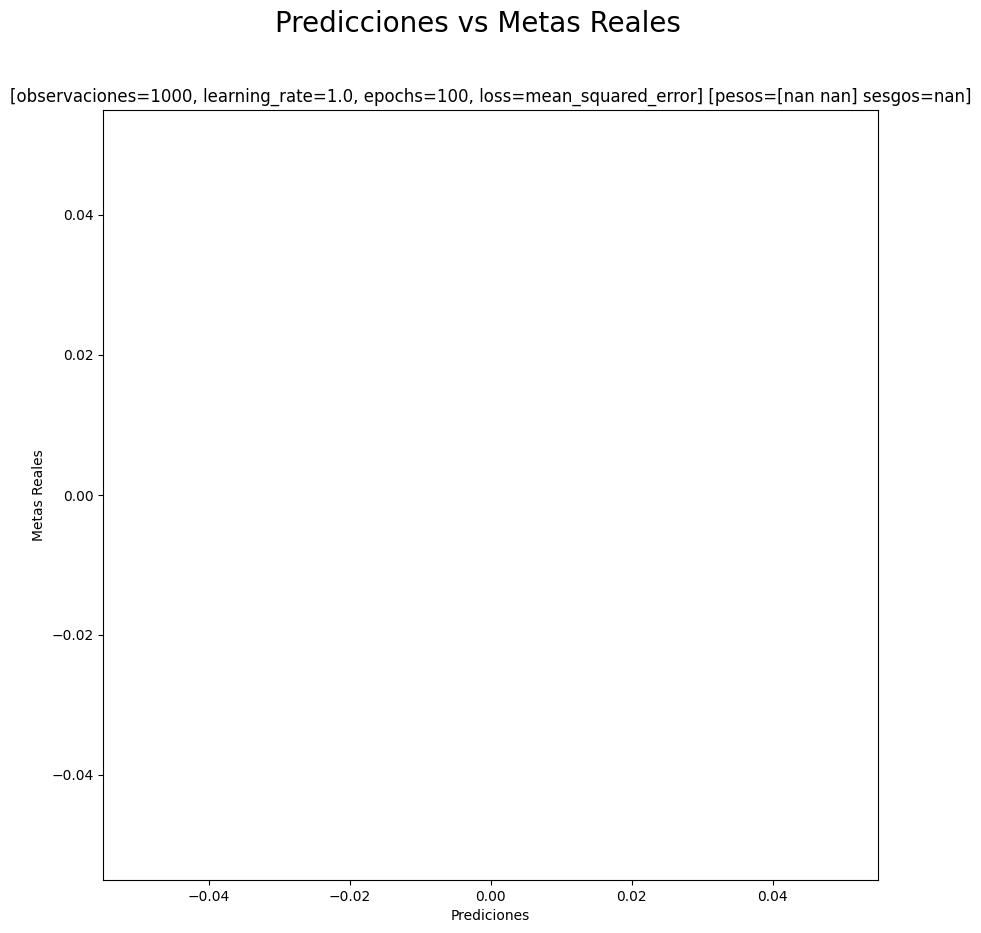

In [6]:
# Experimente con diferentes valores para la tasa de aprendizaje. Los valores como
# 0.0001, 0.001, 0.1, 1 son interesantes para observar.
for learning_rate in [0.0001, 0.001, 0.1, 1.0]:
    simpleLinearRegression(learning_rate=learning_rate)

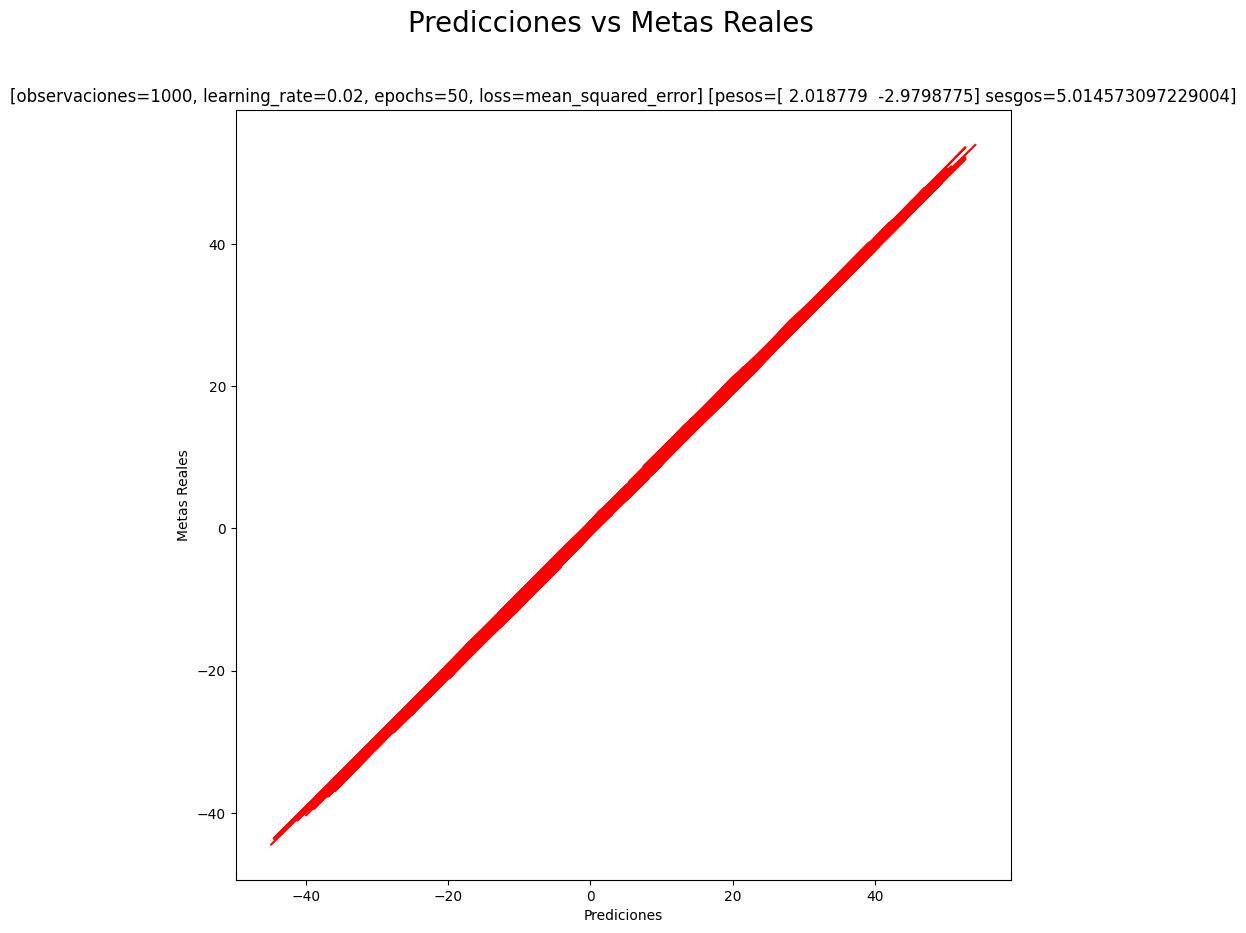

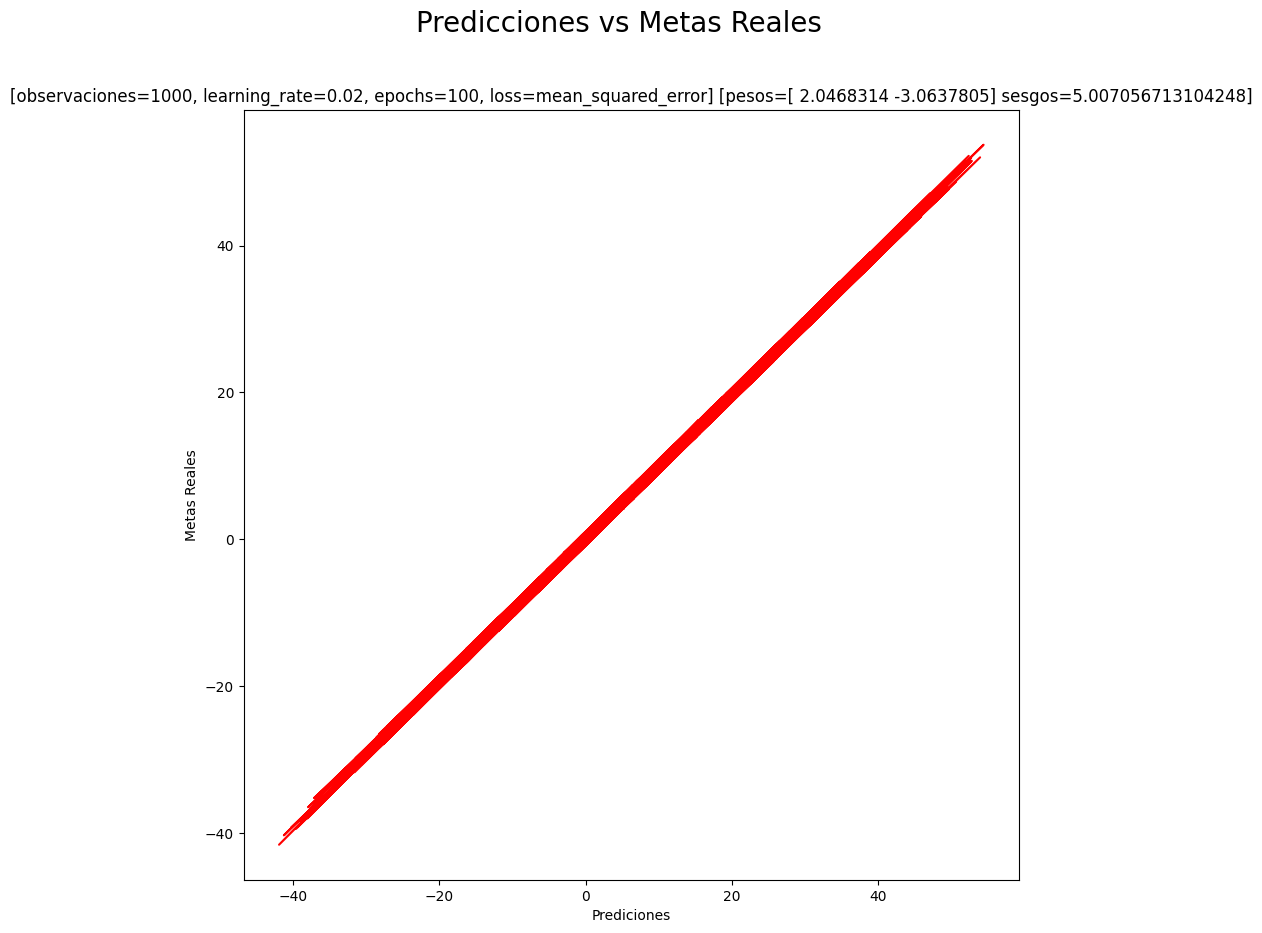

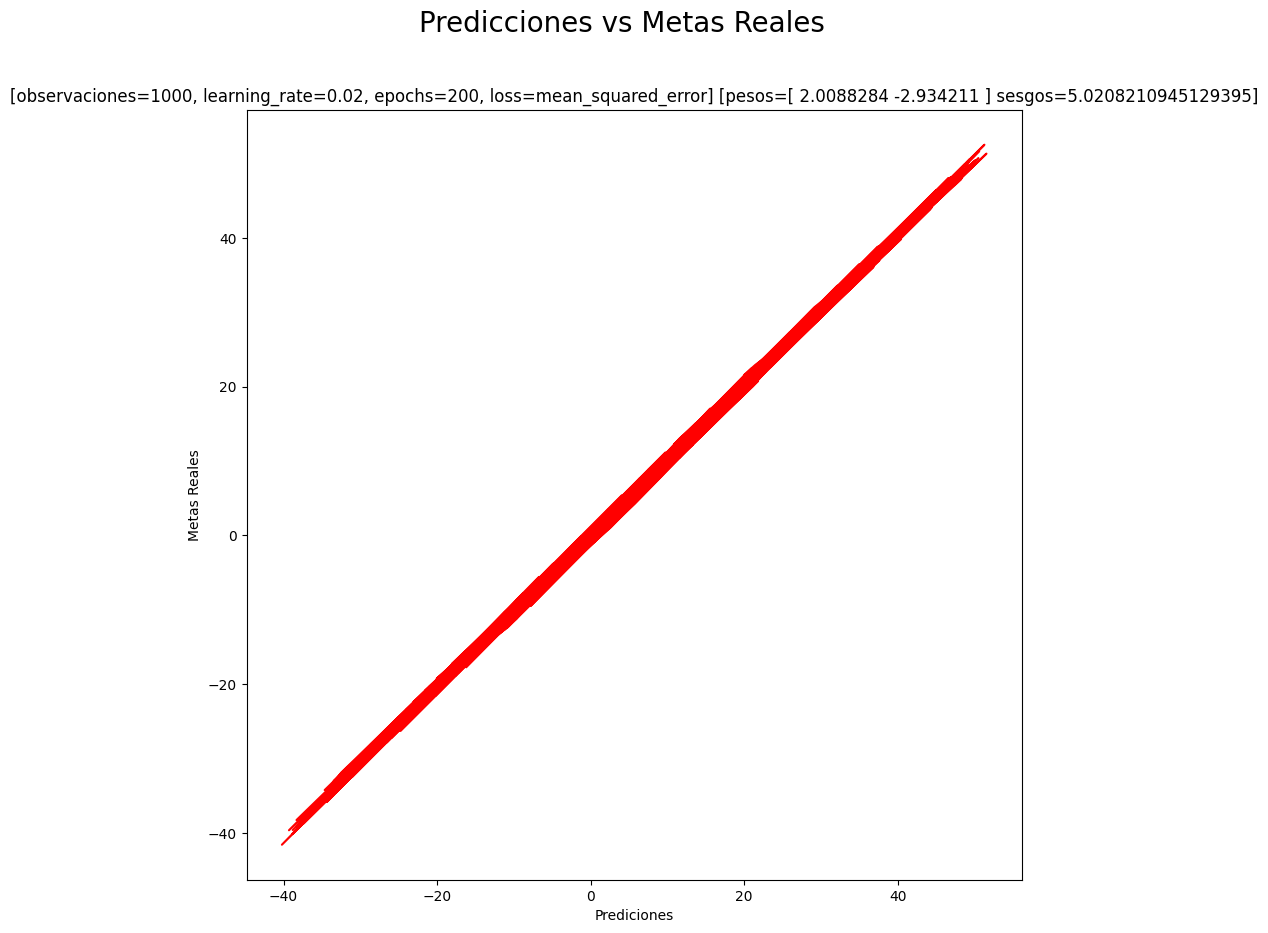

In [7]:
# Prueba también cambiando
# el número de épocas (50, 100, 200). ¿Qué diferencias se observan? ¿Se
# comporta bien el algoritmo?
for epochs in [50, 100, 200]:
    simpleLinearRegression(epochs=epochs)

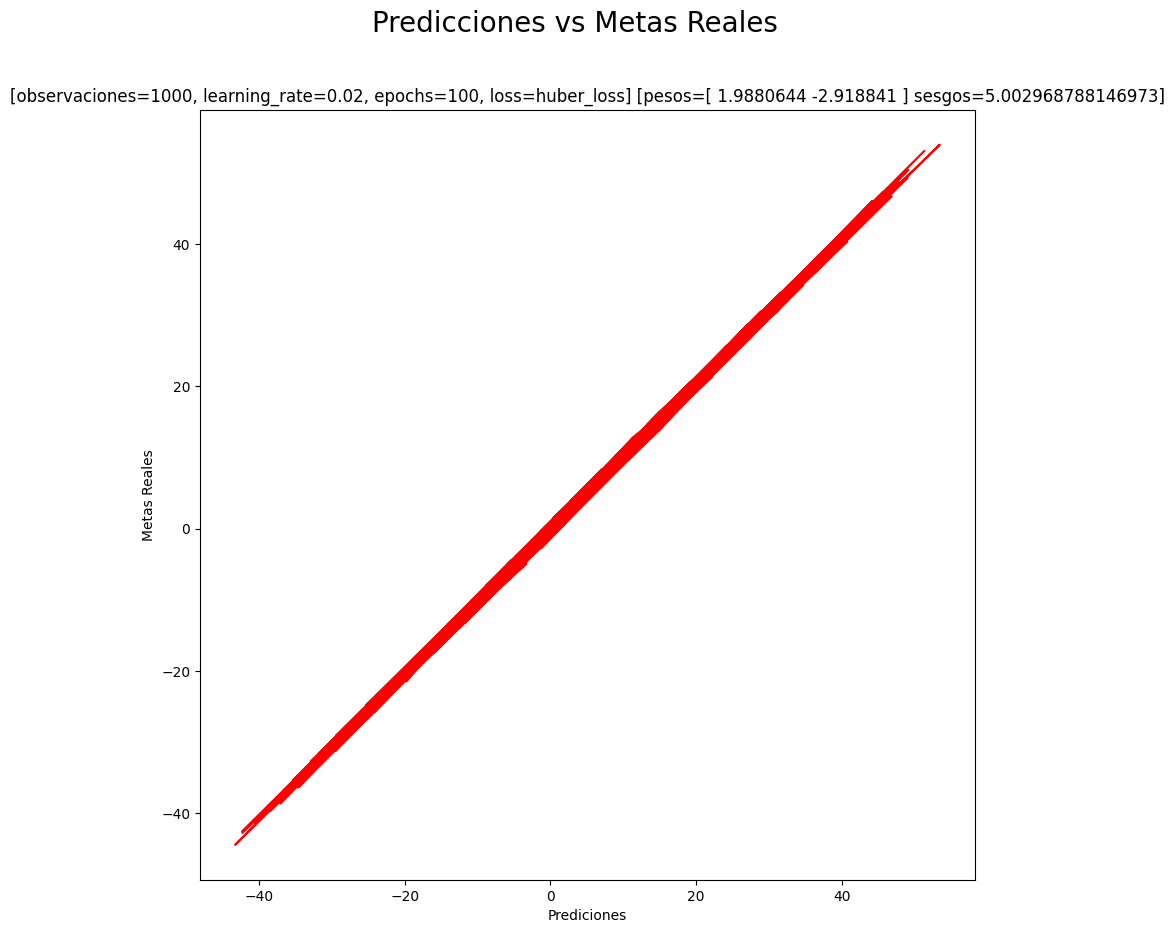

In [13]:
# Cambie la función de pérdida. ¿Cómo se comparan los resultados al cambiar la
# función de pérdida? Una función alternativa es la “Huber Loss”.
simpleLinearRegression(loss='huber_loss')

## 2. Validación Cruzada


- Implemente una técnica de validación cruzada para evaluar la estabilidad y la generalización del modelo.


In [19]:
simpleLinearRegressionCrossValidated()

Loss: 0.019361775368452072, Accuracy: 0.9900000095367432, Precision: 0.9801980257034302 en esta iteración
Loss: 0.027020635083317757, Accuracy: 0.9750000238418579, Precision: 0.9479166865348816 en esta iteración
Loss: 0.02274620532989502, Accuracy: 0.9800000190734863, Precision: 0.9719626307487488 en esta iteración
Loss: 0.012277450412511826, Accuracy: 0.9950000047683716, Precision: 0.9906542301177979 en esta iteración
Loss: 0.020739920437335968, Accuracy: 0.9850000143051147, Precision: 0.970588207244873 en esta iteración
Resultados finales de validación cruzada: [(0.019361775368452072, 0.9900000095367432, 0.9801980257034302), (0.027020635083317757, 0.9750000238418579, 0.9479166865348816), (0.02274620532989502, 0.9800000190734863, 0.9719626307487488), (0.012277450412511826, 0.9950000047683716, 0.9906542301177979), (0.020739920437335968, 0.9850000143051147, 0.970588207244873)]
Promedio de la pérdida: 0.02042919732630253
Promedio de la precisión: 0.9722639560699463


## 3. Interpretación de Resultados
